All libraries imported successfully!

✓ NLTK data downloaded

LOADING DATA
Training samples: 25000
Test samples: 25000
Using 10000 samples for faster training

TEXT PREPROCESSING
Cleaning training data...
Cleaning test data...

✓ Text preprocessing complete!

Example of preprocessing:
--------------------------------------------------------------------------------
ORIGINAL:
Dumb is as dumb does, in this thoroughly uninteresting, supposed black comedy. Essentially what starts out as Chris Klein trying to maintain a low profile, eventually morphs into an uninspired version

CLEANED:
dumb dumb thoroughly uninteresting supposed black comedy essentially start chris klein trying maintain low profile eventually morphs uninspired version three amigo without laugh order black comedy wor

FEATURE EXTRACTION
Creating TF-IDF features...
✓ TF-IDF features created
  - Feature shape: (10000, 5000)
  - Number of features: 5000
✓ Saved TF-IDF vectorizer

MODEL TRAINING

Training Logistic Regression...


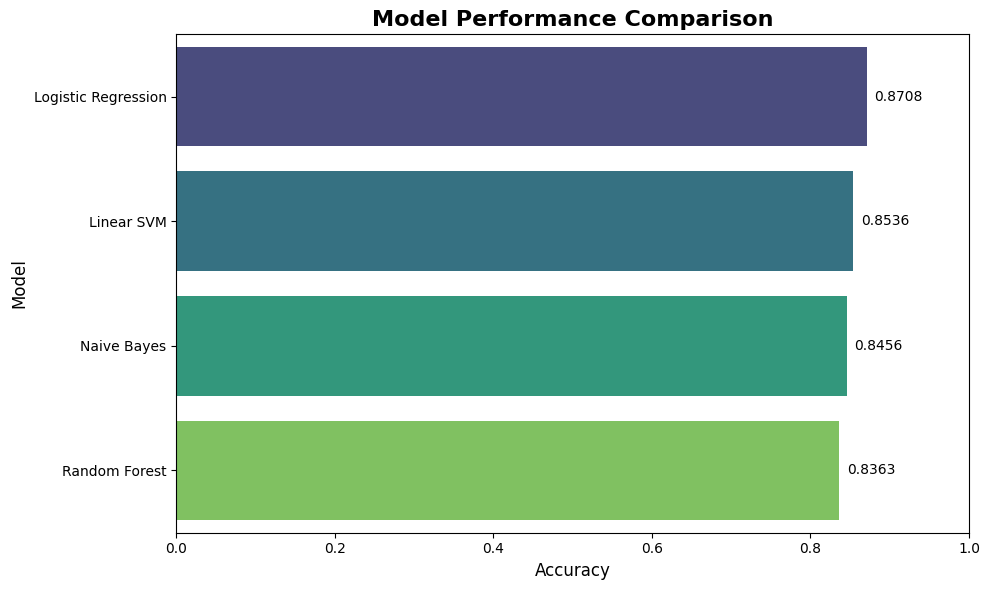


SAVING BEST MODEL
Best Model: Logistic Regression
Accuracy: 0.8708
✓ Saved best model to: models/best_model.pkl

CONFUSION MATRIX
✓ Saved: confusion_matrix.png


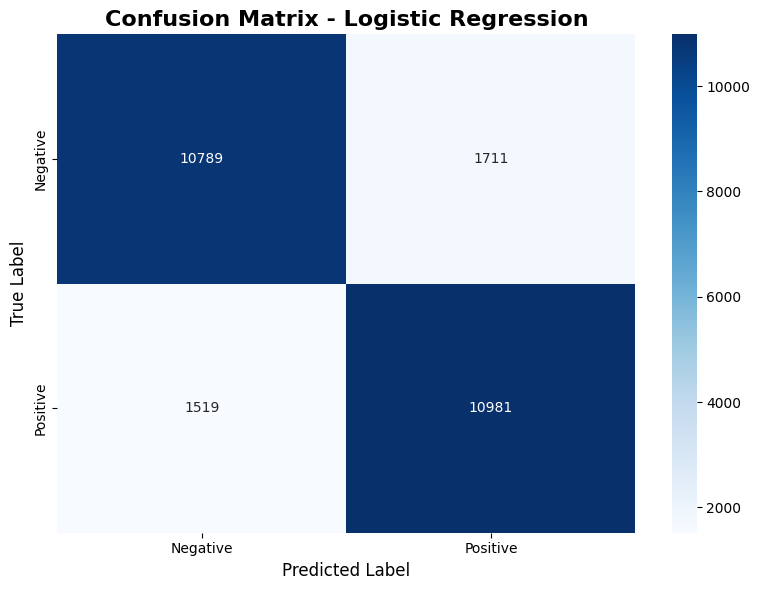


TESTING MODEL WITH SAMPLE PREDICTIONS

Sample Predictions:
--------------------------------------------------------------------------------

1. Review: This movie was absolutely fantastic! I loved every minute of it.
   Predicted: Positive (Confidence: 79.56%)

2. Review: Terrible waste of time. The worst movie I've ever seen.
   Predicted: Negative (Confidence: 99.54%)

3. Review: It was okay, nothing special but not bad either.
   Predicted: Negative (Confidence: 98.22%)

4. Review: Amazing performances and a gripping storyline. Highly recommend!
   Predicted: Positive (Confidence: 96.00%)

5. Review: Boring and predictable. I fell asleep halfway through.
   Predicted: Negative (Confidence: 96.23%)

TRAINING COMPLETE!

Files saved:
  ✓ models/tfidf_vectorizer.pkl
  ✓ models/best_model.pkl
  ✓ data/model_comparison.png
  ✓ data/confusion_matrix.png

Next Steps:
  1. Create the web application with Streamlit
  2. Add interactive features
  3. Deploy to cloud


In [1]:
# Sentiment Analysis - Data Preprocessing and Model Training
# Author: Your Name
# Date: January 2026

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import joblib
import warnings
warnings.filterwarnings('ignore')

print("All libraries imported successfully!")

# Download required NLTK data
print("\nDownloading NLTK data...")
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)
print("✓ NLTK data downloaded")

# ============================================================================
# STEP 1: LOAD THE DATA
# ============================================================================

print("\n" + "="*80)
print("LOADING DATA")
print("="*80)

train_df = pd.read_csv('../data/train_processed.csv')
test_df = pd.read_csv('../data/test_processed.csv')

print(f"Training samples: {len(train_df)}")
print(f"Test samples: {len(test_df)}")

# For faster training, let's use a subset (remove this line for full dataset)
train_df = train_df.sample(n=10000, random_state=42).reset_index(drop=True)
print(f"Using {len(train_df)} samples for faster training")

# ============================================================================
# STEP 2: TEXT PREPROCESSING
# ============================================================================

print("\n" + "="*80)
print("TEXT PREPROCESSING")
print("="*80)

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    """
    Clean and preprocess text data
    """
    # Convert to lowercase
    text = text.lower()
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Tokenize and remove stopwords
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    return ' '.join(words)

print("Cleaning training data...")
train_df['cleaned_text'] = train_df['text'].apply(clean_text)

print("Cleaning test data...")
test_df['cleaned_text'] = test_df['text'].apply(clean_text)

print("\n✓ Text preprocessing complete!")

# Show example
print("\nExample of preprocessing:")
print("-" * 80)
print("ORIGINAL:")
print(train_df['text'].iloc[0][:200])
print("\nCLEANED:")
print(train_df['cleaned_text'].iloc[0][:200])

# ============================================================================
# STEP 3: FEATURE EXTRACTION (TF-IDF)
# ============================================================================

print("\n" + "="*80)
print("FEATURE EXTRACTION")
print("="*80)

# Split data
X_train = train_df['cleaned_text']
y_train = train_df['label']
X_test = test_df['cleaned_text']
y_test = test_df['label']

# TF-IDF Vectorization
print("Creating TF-IDF features...")
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(f"✓ TF-IDF features created")
print(f"  - Feature shape: {X_train_tfidf.shape}")
print(f"  - Number of features: {len(tfidf.get_feature_names_out())}")

# Save the vectorizer
joblib.dump(tfidf, '../models/tfidf_vectorizer.pkl')
print("✓ Saved TF-IDF vectorizer")

# ============================================================================
# STEP 4: MODEL TRAINING
# ============================================================================

print("\n" + "="*80)
print("MODEL TRAINING")
print("="*80)

# Dictionary to store models and their scores
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Naive Bayes': MultinomialNB(),
    'Linear SVM': LinearSVC(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
}

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train the model
    model.fit(X_train_tfidf, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_tfidf)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    print(f"✓ {name} trained - Accuracy: {accuracy:.4f}")
    
    # Save classification report
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred, 
                                target_names=['Negative', 'Positive']))

# ============================================================================
# STEP 5: MODEL COMPARISON
# ============================================================================

print("\n" + "="*80)
print("MODEL COMPARISON")
print("="*80)

# Display results
results_df = pd.DataFrame(list(results.items()), 
                          columns=['Model', 'Accuracy'])
results_df = results_df.sort_values('Accuracy', ascending=False)
print(results_df.to_string(index=False))

# Visualize results
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Accuracy', y='Model', palette='viridis')
plt.title('Model Performance Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Accuracy', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.xlim(0, 1)
for i, v in enumerate(results_df['Accuracy']):
    plt.text(v + 0.01, i, f'{v:.4f}', va='center')
plt.tight_layout()
plt.savefig('../data/model_comparison.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved: model_comparison.png")
plt.show()

# ============================================================================
# STEP 6: SAVE THE BEST MODEL
# ============================================================================

print("\n" + "="*80)
print("SAVING BEST MODEL")
print("="*80)

# Get the best model
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]

print(f"Best Model: {best_model_name}")
print(f"Accuracy: {results_df.iloc[0]['Accuracy']:.4f}")

# Save the best model
joblib.dump(best_model, '../models/best_model.pkl')
print("✓ Saved best model to: models/best_model.pkl")

# ============================================================================
# STEP 7: CONFUSION MATRIX
# ============================================================================

print("\n" + "="*80)
print("CONFUSION MATRIX")
print("="*80)

y_pred_best = best_model.predict(X_test_tfidf)
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=16, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.savefig('../data/confusion_matrix.png', dpi=300, bbox_inches='tight')
print("✓ Saved: confusion_matrix.png")
plt.show()

# ============================================================================
# STEP 8: TEST WITH SAMPLE PREDICTIONS
# ============================================================================

print("\n" + "="*80)
print("TESTING MODEL WITH SAMPLE PREDICTIONS")
print("="*80)

def predict_sentiment(text, model, vectorizer):
    """
    Predict sentiment for a given text
    """
    # Clean the text
    cleaned = clean_text(text)
    
    # Transform to TF-IDF
    text_tfidf = vectorizer.transform([cleaned])
    
    # Predict
    prediction = model.predict(text_tfidf)[0]
    
    # Get probability (if available)
    if hasattr(model, 'predict_proba'):
        proba = model.predict_proba(text_tfidf)[0]
        confidence = max(proba)
    else:
        confidence = None
    
    sentiment = 'Positive' if prediction == 1 else 'Negative'
    
    return sentiment, confidence

# Test samples
test_reviews = [
    "This movie was absolutely fantastic! I loved every minute of it.",
    "Terrible waste of time. The worst movie I've ever seen.",
    "It was okay, nothing special but not bad either.",
    "Amazing performances and a gripping storyline. Highly recommend!",
    "Boring and predictable. I fell asleep halfway through."
]

print("\nSample Predictions:")
print("-" * 80)
for i, review in enumerate(test_reviews, 1):
    sentiment, confidence = predict_sentiment(review, best_model, tfidf)
    print(f"\n{i}. Review: {review}")
    print(f"   Predicted: {sentiment}", end='')
    if confidence:
        print(f" (Confidence: {confidence:.2%})")
    else:
        print()

# ============================================================================
# SUMMARY
# ============================================================================

print("\n" + "="*80)
print("TRAINING COMPLETE!")
print("="*80)
print("\nFiles saved:")
print("  ✓ models/tfidf_vectorizer.pkl")
print("  ✓ models/best_model.pkl")
print("  ✓ data/model_comparison.png")
print("  ✓ data/confusion_matrix.png")
print("\nNext Steps:")
print("  1. Create the web application with Streamlit")
print("  2. Add interactive features")
print("  3. Deploy to cloud")
print("="*80)